# 1) Integración de Datos
Datos del Censo de Población y Vivienda 2020 por municipio y los indicadores de pobreza generados por Coneval en el año 2020.

### 1) Carencia por acceso a los servicios básicos en la vivienda,
### 2) Población en situación de pobreza

In [ ]:
import pandas as pd
coneval = pd.read_csv('coneval2020.csv',encoding='latin1')
coneval.head(3)

,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob,pobreza_e,pobreza_e_pob,pobreza_m,...,ic_ali,ic_ali_pob,carencias,carencias_pob,carencias3,carencias3_pob,plp,plp_pob,plp_e,plp_e_pob
0,1,Aguascalientes,1001,Aguascalientes,"922,268",23.7,"218,414",2.0,"18,206",21.7,...,15.8,"145,444",51.6,"475,558",7.2,"66,231",33.7,"310,444",9.0,"82,866"
1,1,Aguascalientes,1002,Asientos,"48,635",40.1,"19,518",4.1,"2,015",36.0,...,28.5,"13,870",79.7,"38,761",15.7,"7,650",46.8,"22,737",15.8,"7,683"
2,1,Aguascalientes,1003,Calvillo,"52,377",45.8,"23,966",4.5,"2,356",41.3,...,20.1,"10,552",86.2,"45,164",14.4,"7,520",49.5,"25,935",16.0,"8,380"


In [ ]:
# variables objetivo: pobreza_pob, ic_sbv_pob
coneval = coneval[['clave_entidad', 'municipio', 'pobreza_pob', 'ic_sbv_pob']]
coneval.head(3)

,clave_entidad,municipio,pobreza_pob,ic_sbv_pob
0,1,Aguascalientes,"218,414","10,473"
1,1,Asientos,"19,518","3,604"
2,1,Calvillo,"23,966","1,612"


In [ ]:
inegi = pd.read_csv('inegi.csv')
inegi.head(10)

<ipython-input-41-e59d86ea75bb>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  inegi = pd.read_csv('inegi.csv')


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*
5,1,Aguascalientes,0,Total de la entidad Aguascalientes,9999,Localidades de dos viviendas,NaN,NaN,NaN,3021,...,470,146,156,35,38,25,44,330,11,*
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,251719,178619,130290,80951,56131,3299,7293,74227,731,*
7,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878.0,863893,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
8,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",1902.0,5,...,*,*,*,*,*,*,*,*,*,1
9,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",1861.0,41,...,11,4,5,2,1,0,1,6,0,1


In [ ]:
inegi_filtrado = inegi[inegi["NOM_LOC"].str.strip() == "Total del Municipio"].copy()
inegi_filtrado.rename(columns={'NOM_MUN': 'municipio', 'ENTIDAD': 'clave_entidad'}, inplace=True)

In [ ]:
inegi_filtrado.head(3)

,clave_entidad,NOM_ENT,MUN,municipio,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,251719,178619,130290,80951,56131,3299,7293,74227,731,*
574,1,Aguascalientes,2,Asientos,0,Total del Municipio,NaN,NaN,NaN,51536,...,10682,4526,3882,596,556,377,1447,7206,177,*
749,1,Aguascalientes,3,Calvillo,0,Total del Municipio,NaN,NaN,NaN,58250,...,13666,6553,4749,1382,1352,443,904,8061,138,*


In [ ]:
df = pd.merge(inegi_filtrado,coneval, on=['municipio','clave_entidad'], how='left')

# 2) Entendimiento y exploración de los datos del negocio [Individual]

a) Dimensión del dataset. Indica cantidad de registros y columnas:

In [ ]:
 df.shape

(414, 288)

In [ ]:
df.columns

Index(['clave_entidad', 'NOM_ENT', 'MUN', 'municipio', 'LOC', 'NOM_LOC',
       'LONGITUD', 'LATITUD', 'ALTITUD', 'POBTOT',
       ...
       'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC',
       'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC', 'pobreza_pob', 'ic_sbv_pob'],
      dtype='object', length=288)

In [ ]:
print(df.dtypes)

clave_entidad     int64
NOM_ENT          object
MUN               int64
municipio        object
LOC               int64
                  ...  
VPH_SINCINT      object
VPH_SINTIC       object
TAMLOC           object
pobreza_pob      object
ic_sbv_pob       object
Length: 288, dtype: object


c) Exploración de datos:

_Cada miembro del equipo debe seleccionar 5 variables diferentes que considere estén asociadas al indicador seleccionado.  Las variables deben ser diferentes entre los miembros del equipo._

In [ ]:
columnas_objeto = ['clave_entidad', 'NOM_ENT',	'MUN',	'municipio',	'LOC',	'NOM_LOC']
for col in df.columns:
    if col not in columnas_objeto:
        df[col] = df[col].astype(str).str.replace(',', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        df[col] = df[col].astype(str)
df.dtypes

,0
clave_entidad,object
NOM_ENT,object
MUN,object
municipio,object
LOC,object
...,...
VPH_SINCINT,int64
VPH_SINTIC,int64
TAMLOC,float64
pobreza_pob,float64


In [ ]:
df.describe(include="object")

,clave_entidad,NOM_ENT,MUN,municipio,LOC,NOM_LOC
count,2469,2469,2469,2469,2469,2469
unique,32,32,570,2326,1,1
top,20,Oaxaca,3,Benito Juárez,0,Total del Municipio
freq,570,570,32,7,2469,2469


In [ ]:
df.isnull().sum() / len(df) * 100

,0
clave_entidad,0.000000
NOM_ENT,0.000000
MUN,0.000000
municipio,0.000000
LOC,0.000000
...,...
VPH_SINCINT,0.000000
VPH_SINTIC,0.000000
TAMLOC,100.000000
pobreza_pob,0.966184


In [ ]:
df.describe(include=[float, int])

,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,...,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,pobreza_pob,ic_sbv_pob
count,0.0,0.0,0.0,4.140000e+02,414.000000,414.000000,414.000000,414.000000,414.000000,4.140000e+02,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,0.0,410.000000,410.000000
mean,NaN,NaN,NaN,9.559546e+04,48869.867150,46725.596618,4320.309179,2132.545894,2187.763285,9.103522e+04,...,12033.717391,6019.398551,3659.830918,1319.473430,2278.388889,10547.847826,679.509662,NaN,38424.078049,15118.080488
std,NaN,NaN,NaN,2.285950e+05,116507.913894,112143.899101,9168.239745,4509.261902,4659.287923,2.191841e+05,...,30910.626113,20786.693484,12515.319242,2072.369775,3189.692768,18615.515891,1239.049686,NaN,78769.031806,24212.378216
min,NaN,NaN,NaN,8.240000e+02,413.000000,411.000000,35.000000,12.000000,18.000000,7.790000e+02,...,4.000000,0.000000,0.000000,5.000000,28.000000,205.000000,3.000000,NaN,112.000000,22.000000
25%,NaN,NaN,NaN,9.934500e+03,5021.750000,5032.250000,580.750000,289.000000,288.000000,9.293250e+03,...,902.000000,28.000000,30.250000,211.250000,478.000000,1888.750000,96.000000,NaN,5685.500000,1284.000000
50%,NaN,NaN,NaN,2.599200e+04,12896.000000,12819.500000,1591.000000,770.000000,798.500000,2.432850e+04,...,2474.000000,139.500000,116.500000,641.000000,1240.000000,4738.500000,319.000000,NaN,14734.000000,5986.000000
75%,NaN,NaN,NaN,6.572550e+04,33459.250000,32249.000000,3781.750000,1879.250000,1891.000000,6.170100e+04,...,6890.000000,1061.250000,760.250000,1602.750000,2695.250000,10635.000000,761.750000,NaN,38264.750000,19622.500000
max,NaN,NaN,NaN,1.922523e+06,953783.000000,968740.000000,85112.000000,41780.000000,43332.000000,1.839517e+06,...,316358.000000,204565.000000,114400.000000,18793.000000,25648.000000,152647.000000,15652.000000,NaN,816934.000000,220919.000000


In [ ]:
df = df.drop(columns=['LONGITUD','LATITUD','ALTITUD'], errors='ignore')

<Axes: title={'center': 'ic_sbv_pob'}, ylabel='NOM_ENT'>

<Figure size 1500x800 with 0 Axes>

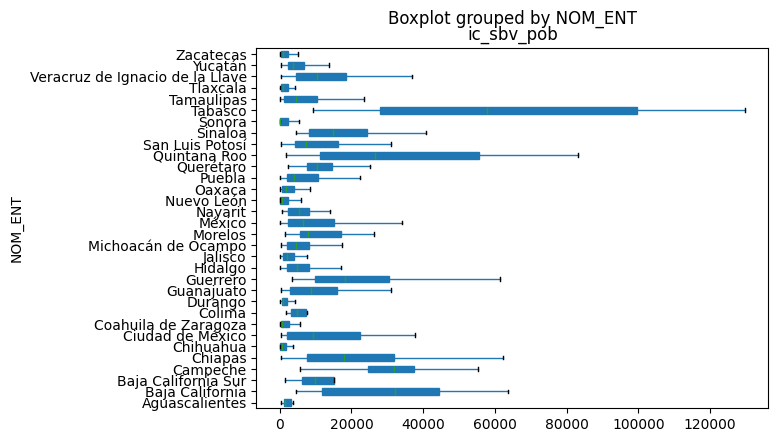

In [ ]:
import matplotlib.pyplot as plt

sorted_entidades = df.groupby('NOM_ENT')['ic_sbv_pob'].median().index

plt.figure(figsize=(15, 8))
df.boxplot(column='ic_sbv_pob', by='NOM_ENT', vert=False, patch_artist=True,
           showfliers=False, positions=range(len(sorted_entidades)),
           widths=0.6, grid=False)

2) Explora los datos usando herramientas de visualización

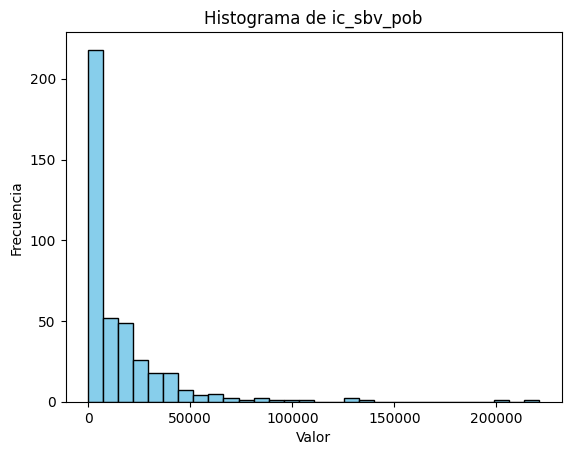

In [ ]:
plt.hist(df[['ic_sbv_pob']], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de ic_sbv_pob')

plt.show()

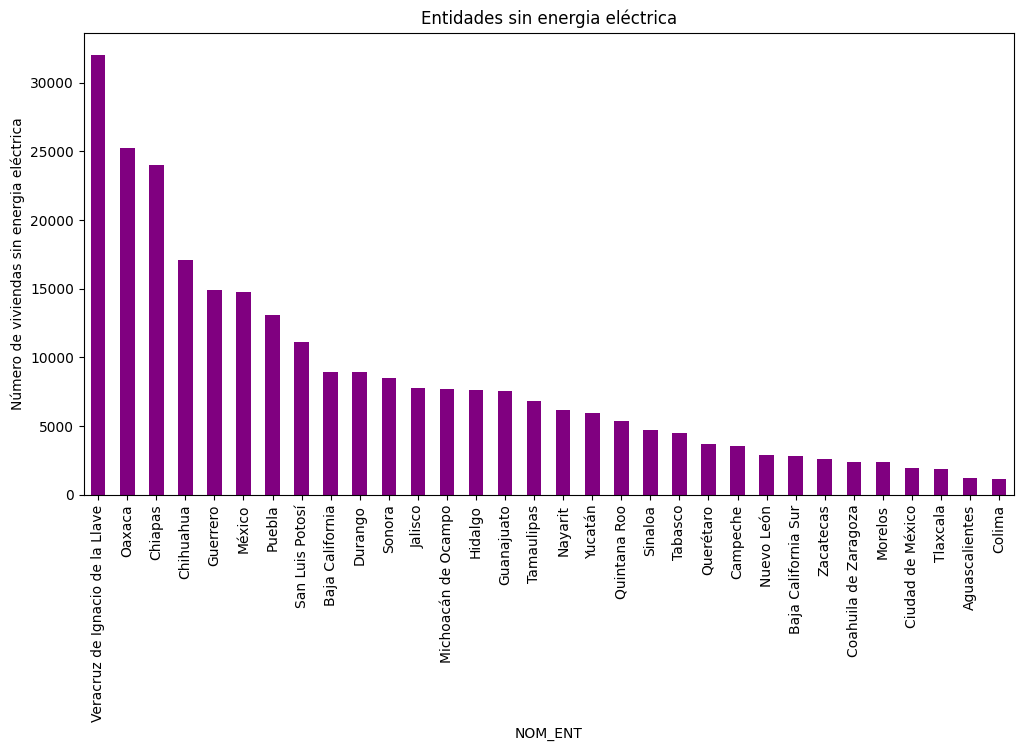

In [ ]:
municipios_agrupados = df.groupby('NOM_ENT')['VPH_S_ELEC'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
municipios_agrupados.plot(kind='bar', color='purple')
plt.xlabel("NOM_ENT")
plt.ylabel("Número de viviendas sin energia eléctrica")
plt.title("Entidades sin energia eléctrica")
plt.xticks(rotation=90)
plt.show()

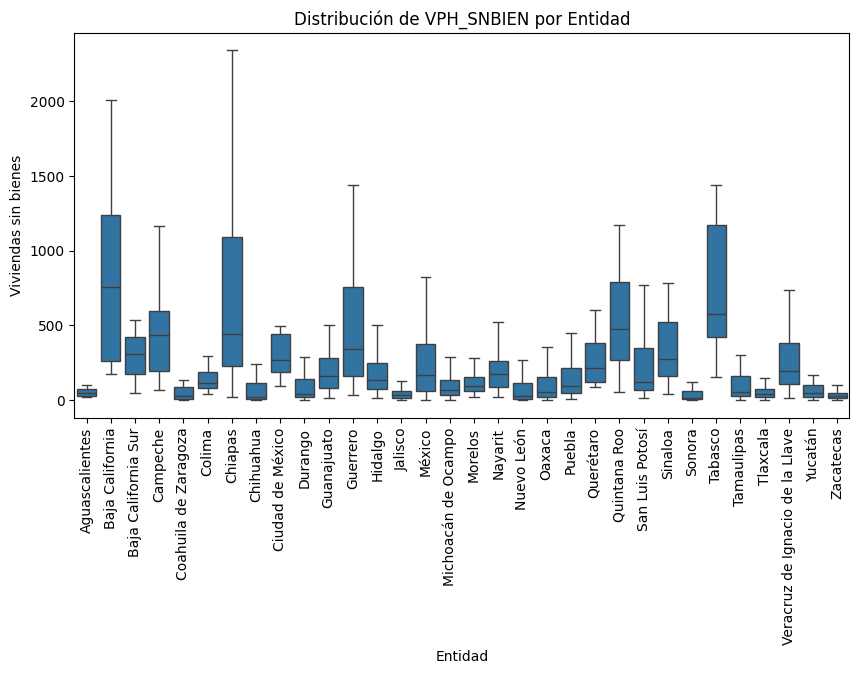

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))

sns.boxplot(data=df, x="NOM_ENT", y="VPH_SNBIEN", showfliers=False) # sin outliers para mejor claridad
plt.xticks(rotation=90)

plt.xlabel("Entidad")
plt.ylabel("Viviendas sin bienes")
plt.title("Distribución de VPH_SNBIEN por Entidad")

plt.show()


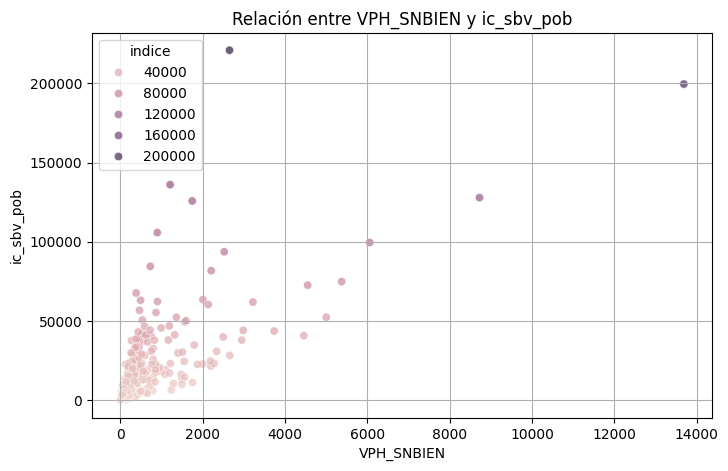

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df['VPH_SNBIEN'], y=df['ic_sbv_pob'], hue="ic_sbv_pob", alpha=0.7)

plt.title(f"Relación entre VPH_SNBIEN y ic_sbv_pob")
plt.xlabel('VPH_SNBIEN')
plt.ylabel('ic_sbv_pob')
plt.legend(title="indice")
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd

corr_matrix = df[['VPH_SNBIEN', 'ic_sbv_pob']].corr(method='pearson')
print(corr_matrix)


            VPH_SNBIEN  ic_sbv_pob
VPH_SNBIEN    1.000000    0.717219
ic_sbv_pob    0.717219    1.000000


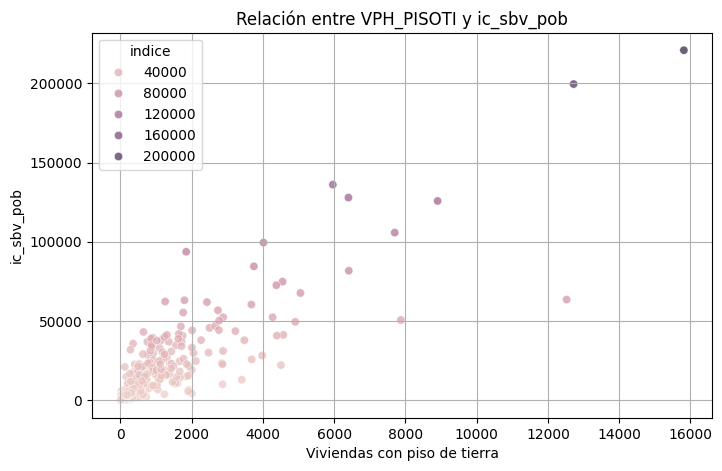

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df['VPH_PISOTI'], y=df['ic_sbv_pob'], hue="ic_sbv_pob", alpha=0.7)

plt.title(f"Relación entre VPH_PISOTI y ic_sbv_pob")
plt.xlabel('Viviendas con piso de tierra')
plt.ylabel('ic_sbv_pob')
plt.legend(title="indice")
plt.grid(True)

plt.show()

In [ ]:
columnas_interes = ['VPH_S_ELEC', 'VPH_SNBIEN', 'VPH_PISOTI', 'PHOG_IND', 'P3YM_HLI','P3HLINHE','P15YM_AN_F','ic_sbv_pob']
correlacion_df = df[columnas_interes].corr()


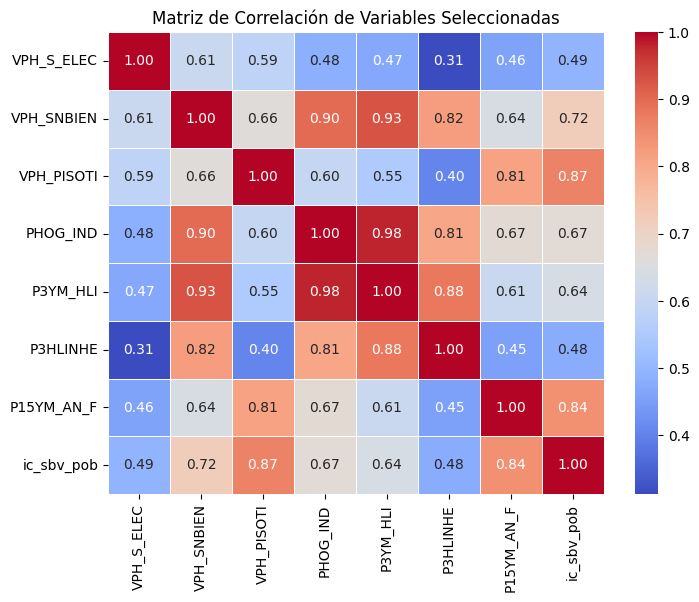

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()


# Selección de variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_numeric = df.select_dtypes(include=['number'])

df_grouped = df_numeric.groupby(df['municipio']).mean().reset_index()

df_grouped = df_grouped.drop(columns=['municipio'])

X = df_grouped.drop(columns=['pobreza_pob'])
y = df_grouped['pobreza_pob'].fillna(df_grouped['pobreza_pob'].mean())

sión de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Importancia de las variables:")
print(feat_importances)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


Importancia de las variables:
PSINDER        0.430086
VPH_SINCINT    0.164898
VPH_NDACMM     0.116763
P15PRI_INF     0.030586
VPH_2CUART     0.027709
                 ...   
P_12YMAS_F     0.000004
LATITUD        0.000000
ALTITUD        0.000000
TAMLOC         0.000000
LONGITUD       0.000000
Length: 281, dtype: float64


In [ ]:
df[["PSINDER", "VPH_SINCINT", "VPH_NDACMM", "VPH_2CUART", "P15PRI_INF", 'pobreza_pob']].corr()

,PSINDER,VPH_SINCINT,VPH_NDACMM,VPH_2CUART,P15PRI_INF,pobreza_pob
PSINDER,1.000000,0.929029,0.973803,0.925030,0.947607,0.957463
VPH_SINCINT,0.929029,1.000000,0.943301,0.938111,0.968385,0.944646
VPH_NDACMM,0.973803,0.943301,1.000000,0.940899,0.944724,0.949524
VPH_2CUART,0.925030,0.938111,0.940899,1.000000,0.925102,0.912421
P15PRI_INF,0.947607,0.968385,0.944724,0.925102,1.000000,0.944566
pobreza_pob,0.957463,0.944646,0.949524,0.912421,0.944566,1.000000


In [ ]:

X = df_grouped.drop(columns=['ic_sbv_pob'])
y = df_grouped['ic_sbv_pob']
y = y.fillna(y.mean())

# solo al train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Importancia de las variables:")
print(feat_importances)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


Importancia de las variables:
VPH_SINLTC    0.203063
VPH_SINTIC    0.154437
VPH_AGUAFV    0.144960
P15YM_AN_F    0.109599
VPH_PISOTI    0.099743
                ...   
POBHOG        0.000013
LATITUD       0.000000
ALTITUD       0.000000
TAMLOC        0.000000
LONGITUD      0.000000
Length: 281, dtype: float64


In [ ]:
# df final con variables elegidas (entre ambos modelos)

df_final = df[["VPH_SINLTC", "VPH_SINTIC", "VPH_AGUAFV", "P15YM_AN_F", "VPH_PISOTI", 'ic_sbv_pob']]
